In [1]:
using CSV
using DataFrames
using Plots, StatsPlots
using Statistics
using Queryverse
using LaTeXStrings

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1317
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1317


In [2]:
theme(:wong2)
gr()

Plots.GRBackend()

In [3]:
dfs = []
for i in 1:50
    try
        df = CSV.File("../insights/fmnist_original/fmnist_regmh_0.0_0.0_0.0_$(i).csv", delim="\t") |> DataFrame
        push!(dfs, df)
    catch
        nothing
    end 
end 

df = vcat(dfs...)
df_ = df[(!).(isnan.(df[!, Symbol("Avg centroid distance")])), :]

m_inner_d = mean(df_[!, Symbol("Avg node empirical distance")])
m_outter_d =  mean(df_[!, Symbol("Avg centroid distance")])

3.816129751594119e6

┌ Warning: ../insights/fmnist/fmnist_regmh_1.0_0.0001_1.0_41.csv
└ @ Main In[8]:20
┌ Warning: ../insights/fmnist/fmnist_regmh_10.0_0.0001_1.0_14.csv
└ @ Main In[8]:20
┌ Warning: ../insights/fmnist/fmnist_regmh_10.0_0.0001_1.0_36.csv
└ @ Main In[8]:20
┌ Warning: ../insights/fmnist/fmnist_regmh_100.0_0.0001_1.0_6.csv
└ @ Main In[8]:20
┌ Warning: ../insights/fmnist/fmnist_regmh_100.0_0.0001_1.0_14.csv
└ @ Main In[8]:20
┌ Warning: ../insights/fmnist/fmnist_regmh_0.01_0.001_1.0_6.csv
└ @ Main In[8]:20
┌ Warning: ../insights/fmnist/fmnist_regmh_0.1_0.001_1.0_7.csv
└ @ Main In[8]:20
┌ Warning: ../insights/fmnist/fmnist_regmh_1.0_0.001_1.0_24.csv
└ @ Main In[8]:20
┌ Warning: ../insights/fmnist/fmnist_regmh_10.0_0.001_1.0_34.csv
└ @ Main In[8]:20
┌ Warning: ../insights/fmnist/fmnist_regmh_10.0_0.001_1.0_40.csv
└ @ Main In[8]:20
┌ Warning: ../insights/fmnist/fmnist_regmh_10.0_0.001_1.0_43.csv
└ @ Main In[8]:20
┌ Warning: ../insights/fmnist/fmnist_regmh_100.0_0.001_1.0_31.csv
└ @ Main In[8]:20
┌ 

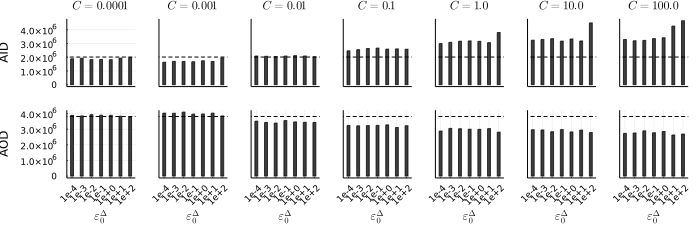

In [8]:
params = ["0.0001", "0.001", "0.01", "0.1", "1.0", "10.0", "100.0"]
coverted_params = ["1e-4", "1e-3", "1e-2", "1e-1", "1e+0", "1e+1", "1e+2"]
# coverted_params = map(x -> parse(Float64, x), params)

plts1 = []
plts2 = []
fname = ""
for (i, C) in enumerate(params)
    inner_d = []
    outter_d = []

    for ep in params
        dfs = []
        for i in 1:50
            try
                fname = "../insights/fmnist/fmnist_regmh_$(ep)_$(C)_1.0_$i.csv"
                df = CSV.File(fname) |> DataFrame
                push!(dfs, df)
            catch
                @warn(fname)
            end 
        end 

        df = vcat(dfs...)

        try
            df_ = df[(!).(isnan.(df[!, Symbol("Avg centroid distance")])), :]
            push!(inner_d, mean(df_[!, Symbol("Avg node empirical distance")]))
            push!(outter_d, mean(df_[!, Symbol("Avg centroid distance")]))
        catch
            @warn("There must be errors here! Please check. This is a tmp solution for checking some results")
            push!(inner_d, 0)
            push!(outter_d, 0)
        end 
    end 
    
    if i != 1
        p1 = bar(coverted_params, inner_d, legend=false, bar_width=0.3, 
                 xticks=nothing, yticks=nothing, 
                 xrotation=45, alpha=.75, 
                 title=L"C=%$C")
        hline!([m_inner_d], color="black", linestyle=:dash, lw=1)
        p2 = bar(coverted_params, outter_d, legend=false, bar_width=0.3, xlabel=L"\epsilon_0^\Delta", 
                 xrotation=45, alpha=.75, yticks=nothing, )
        hline!([m_outter_d], color="black", linestyle=:dash, lw=1)
    else 
        p1 = bar(coverted_params, inner_d, legend=false, bar_width=0.3, xticks=nothing, 
                 title=L"C=%$C",
                 ylabel="AID",  
                 alpha=.75, 
                 xrotation=45)
        hline!([m_inner_d], color="black", linestyle=:dash, lw=1)
        p2 = bar(coverted_params, outter_d, legend=false, bar_width=0.3, 
                 xlabel=L"\epsilon_0^\Delta",
                 ylabel="AOD", 
                 alpha=.75, 
                 xrotation=45)
        hline!([m_outter_d], color="black", linestyle=:dash, lw=1)
    end 
    push!(plts1, p1)
    push!(plts2, p2)
end 


extra_p0 = plot(framestyle=:none)
extra_p1 = plot([0], [0], label="BHMC", 
                legendfontsize=10, legend=:top,
                lw=2, ls=:dot, framestyle=:none)
extra_p2 = plot(framestyle=:none)

l = @layout [
        grid(2, 7)  
        b{0.0001h}
    ]
p = plot(vcat(plts1, plts2)..., extra_p2, 
         layout=l, size=(700, 250), link=:y,
         tickfontsize=6, 
         titlefontsize=8,
         labelfontsize=8)



In [9]:
savefig(p, "fmnist_sens_ep_per_C.pdf")

┌ Warning: ../insights/fmnist/fmnist_regmh_0.0001_0.01_1.0_7.csv
└ @ Main In[10]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.0001_0.01_1.0_11.csv
└ @ Main In[10]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.0001_0.01_1.0_25.csv
└ @ Main In[10]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.0001_0.1_1.0_3.csv
└ @ Main In[10]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.0001_0.1_1.0_39.csv
└ @ Main In[10]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.0001_0.1_1.0_45.csv
└ @ Main In[10]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.0001_0.1_1.0_47.csv
└ @ Main In[10]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.0001_1.0_1.0_4.csv
└ @ Main In[10]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.0001_1.0_1.0_49.csv
└ @ Main In[10]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.0001_10.0_1.0_21.csv
└ @ Main In[10]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.0001_10.0_1.0_27.csv
└ @ Main In[10]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.0001_10.0_1.0_35.csv
└ @ Main

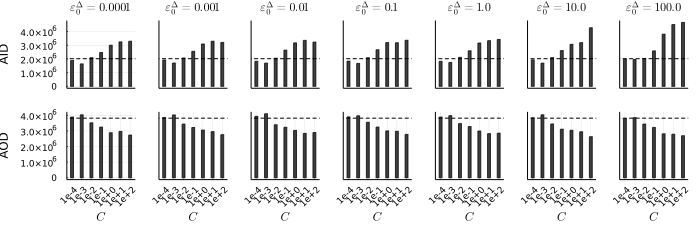

In [10]:
params = ["0.0001", "0.001", "0.01", "0.1", "1.0", "10.0", "100.0"]
coverted_params = ["1e-4", "1e-3", "1e-2", "1e-1", "1e+0", "1e+1", "1e+2"]

plts1 = []
plts2 = []
for (i, ep) in enumerate(params)
    inner_d = []
    outter_d = []

    for C in params
        dfs = []
        for i in 1:50
            try
                fname = "../insights/fmnist/fmnist_regmh_$(ep)_$(C)_1.0_$i.csv"
                df = CSV.File(fname) |> DataFrame
                push!(dfs, df)
            catch
                @warn(fname)
            end 
        end 

        df = vcat(dfs...)
        df_ = df[(!).(isnan.(df[!, Symbol("Avg centroid distance")])), :]

        push!(inner_d, mean(df_[!, Symbol("Avg node empirical distance")]))
        push!(outter_d, mean(df_[!, Symbol("Avg centroid distance")]))
    end 

    if i != 1
        p1 = bar(coverted_params, inner_d, legend=false, bar_width=0.3, 
                 xticks=nothing, yticks=nothing, 
                 xrotation=45, alpha=.75, 
                 title=L"\epsilon_0^\Delta=%$ep")
        hline!([m_inner_d], color="black", linestyle=:dash, lw=1)
        p2 = bar(coverted_params, outter_d, legend=false, bar_width=0.3, xlabel=L"C", 
                 xrotation=45, alpha=.75, yticks=nothing, )
        hline!([m_outter_d], color="black", linestyle=:dash, lw=1)
    else 
        p1 = bar(coverted_params, inner_d, legend=false, bar_width=0.3, xticks=nothing, 
                 title=L"\epsilon_0^\Delta=%$ep", 
                 ylabel="AID",  
                 alpha=.75, 
                 xrotation=45)
        hline!([m_inner_d], color="black", linestyle=:dash, lw=1)
        p2 = bar(coverted_params, outter_d, legend=false, bar_width=0.3, 
                 xlabel=L"C",  
                 ylabel="AOD", 
                 alpha=.75, 
                 xrotation=45)
        hline!([m_outter_d], color="black", linestyle=:dash, lw=1)
    end 
    push!(plts1, p1)
    push!(plts2, p2)
end 

extra_p0 = plot(framestyle=:none)
extra_p1 = plot([0], [0], label="BHMC", 
                legendfontsize=10, legend=:top,
                lw=2, ls=:dot, framestyle=:none)
extra_p2 = plot(framestyle=:none)

l = @layout [
        grid(2, 7)  
        b{0.0001h}
    ]
p = plot(vcat(plts1, plts2)..., extra_p2, 
         layout=l, size=(700, 250), link=:y,
         tickfontsize=6, 
         titlefontsize=8,
         labelfontsize=8)



In [11]:
savefig(p, "fmnist_sens_C_per_ep.pdf")